In [71]:
import pandas as pd 
import numpy as np
import wbgapi as wb
import matplotlib.pyplot as plt
import seaborn as sns

In [103]:
countries = ['Australia','India','Japan','Germany','Canada','France','United States']

country_code = ['AUS','CAN','IND','DEU','USA','JPN','FRA']

country_names = {'AUS':'Australia','CAN':'Canada','IND':'India',
                 'DEU':'Germany','USA':'United States','JPN':'Japan','FRA':'France'}

In [104]:
d_gdp = pd.DataFrame(wb.data.DataFrame('AG.LND.ARBL.HA',country_code, time=range(2008, 2019)))
d_gdp

,YR2008,YR2009,YR2010,YR2011,YR2012,YR2013,YR2014,YR2015,YR2016,YR2017,YR2018
economy,,,,,,,,,,,
AUS,23994100.0,27141600.0,25450200.0,31694900.0,31637400.0,31220800.0,31960300.0,31090700.0,30057000.0,30752000.0,30974000.0
CAN,38485000.0,38086000.0,37687000.0,37285000.0,37534000.0,37783000.0,38032000.0,38282000.0,38530000.0,38509000.0,38687000.0
DEU,11932000.0,11945000.0,11846000.0,11875000.0,11834000.0,11876000.0,11869000.0,11846000.0,11762000.0,11772000.0,11731000.0
FRA,18268700.0,18256200.0,18300700.0,18274400.0,18281700.0,18305700.0,18333100.0,18478700.0,18355916.0,18464367.0,18126400.0
IND,157995000.0,157924000.0,157009000.0,156979000.0,156546000.0,156442000.0,156463000.0,156416000.0,156416000.0,156416000.0,156416000.0
JPN,4308000.0,4294000.0,4282000.0,4254000.0,4246000.0,4238000.0,4222000.0,4205000.0,4184000.0,4161000.0,4142000.0
USA,160425500.0,159071000.0,157716500.0,156362000.0,155007500.0,155553400.0,156099300.0,156645100.0,157191000.0,157736800.0,157736800.0


In [130]:
wb.series.info('AG.LND.ARBL.HA')

id,value
AG.LND.ARBL.HA,Arable land (hectares)
,1 elements


In [106]:
d_popln = pd.DataFrame(wb.data.DataFrame('EN.ATM.CO2E.KD.GD',country_code, time=range(2008, 2019)))
d_popln

,YR2008,YR2009,YR2010,YR2011,YR2012,YR2013,YR2014,YR2015,YR2016,YR2017,YR2018
economy,,,,,,,,,,,
AUS,0.342260,0.341331,0.327982,0.318793,0.306773,0.294004,0.279642,0.278147,0.276400,0.272464,0.264262
CAN,0.393423,0.383635,0.382306,0.379433,0.372468,0.370117,0.363335,0.359009,0.350157,0.347099,0.346182
DEU,0.251307,0.247954,0.250401,0.232670,0.235935,0.240350,0.223016,0.221173,0.217759,0.207832,0.199236
FRA,0.153110,0.151333,0.150192,0.140883,0.141622,0.140936,0.126289,0.127356,0.126864,0.125470,0.120681
IND,1.084924,1.108028,1.084259,1.089335,1.119661,1.084566,1.097049,1.022168,0.958728,0.946310,0.939643
JPN,0.269836,0.271714,0.274024,0.287250,0.292717,0.288952,0.278712,0.265808,0.261562,0.252979,0.241575
USA,0.340759,0.324252,0.330443,0.312076,0.292116,0.294904,0.288377,0.273205,0.263532,0.253578,0.254772


In [131]:
wb.series.info('EN.ATM.CO2E.KD.GD')

id,value
EN.ATM.CO2E.KD.GD,CO2 emissions (kg per 2015 US$ of GDP)
,1 elements


In [107]:
d_full = pd.DataFrame()
gdp = []
population = []
for i in d_popln:
    population.extend(d_popln[i])

for i in d_gdp:
    gdp.extend(d_gdp[i])

d_full['gdp'] = gdp
d_full['population'] = population

In [108]:
type(d_full)

pandas.core.frame.DataFrame

### K-Means Clustering


In [109]:
from sklearn.cluster import KMeans

In [110]:
kmeans = KMeans(n_clusters=3, random_state=0).fit(d_full[['population','gdp']])

In [111]:
kmeans.inertia_

1594130382651606.5

In [112]:
kmeans.cluster_centers_

array([[2.12651445e-01, 1.14627237e+07],
       [6.71031246e-01, 1.57025768e+08],
       [3.34055512e-01, 3.38578636e+07]])

In [113]:
kmeans.n_iter_

2

In [114]:
d_full['cluster'] = kmeans.labels_

In [115]:
d_full

,gdp,population,cluster
0,23994100.0,0.342260,2
1,38485000.0,0.393423,2
2,11932000.0,0.251307,0
3,18268700.0,0.153110,0
4,157995000.0,1.084924,1
...,...,...,...
72,11731000.0,0.199236,0
73,18126400.0,0.120681,0
74,156416000.0,0.939643,1
75,4142000.0,0.241575,0


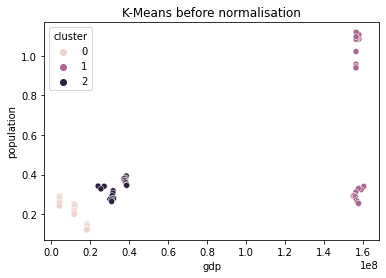

In [144]:
sns.scatterplot(x = 'gdp', y = 'population' , hue='cluster', data = d_full)
plt.title("K-Means before normalisation")
plt.savefig("Kmean_before.png")
plt.show()


### K-means after normalisation

In [117]:
from sklearn import preprocessing

In [118]:
d_f = d_full.drop(['cluster'], axis = 1)


In [119]:
names = ['gdp','population']
d = preprocessing.normalize(d_f, axis=0)
d_pre = pd.DataFrame(d,columns=names)
d_pre

,gdp,population
0,0.031681,0.082540
1,0.050814,0.094879
2,0.015755,0.060606
3,0.024121,0.036924
4,0.208611,0.261642
...,...,...
72,0.015489,0.048048
73,0.023933,0.029104
74,0.206526,0.226606
75,0.005469,0.058259


In [120]:
kmeans = KMeans(n_clusters=3, random_state=0).fit(d_pre[['population','gdp']])

In [121]:
kmeans.inertia_

0.037514495260232615

In [122]:
kmeans.cluster_centers_

array([[0.06299466, 0.02696283],
       [0.25288403, 0.20705948],
       [0.07077043, 0.20760238]])

In [123]:
d_pre['cluster'] = kmeans.labels_

In [124]:
d_pre

,gdp,population,cluster
0,0.031681,0.082540,0
1,0.050814,0.094879,0
2,0.015755,0.060606,0
3,0.024121,0.036924,0
4,0.208611,0.261642,1
...,...,...,...
72,0.015489,0.048048,0
73,0.023933,0.029104,0
74,0.206526,0.226606,1
75,0.005469,0.058259,0


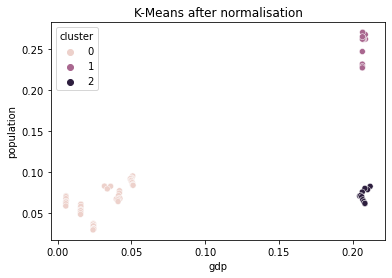

In [143]:
sns.scatterplot(x = 'gdp', y = 'population' , hue='cluster', data = d_pre)
plt.title("K-Means after normalisation")
plt.savefig("Kmean_after.png")
plt.show()

#### curve fit

In [126]:
# from numpy import exp, linspace, random
from scipy.optimize import curve_fit

In [127]:
def func(x,a,b,c):
    return a * np.exp(-(x-b)**2 / c)


def err_ranges(x, func, param, sigma):
    """
    Calculates the upper and lower limits for the function, parameters and
    sigmas for single value or array x. Functions values are calculated for 
    all combinations of +/- sigma and the minimum and maximum is determined.
    Can be used for all number of parameters and sigmas >=1.
    
    This routine can be used in assignment programs.
    """
    import itertools as iter
    
    # initiate arrays for lower and upper limits
    lower = func(x, *param)
    upper = lower
    
    uplow = []   # list to hold upper and lower limits for parameters
    for p,s in zip(param, sigma):
        pmin = p - s
        pmax = p + s
        uplow.append((pmin, pmax))
        
    pmix = list(iter.product(*uplow))
    
    for p in pmix:
        y = func(x, *p)
        lower = np.minimum(lower, y)
        upper = np.maximum(upper, y)
        
    return lower, upper

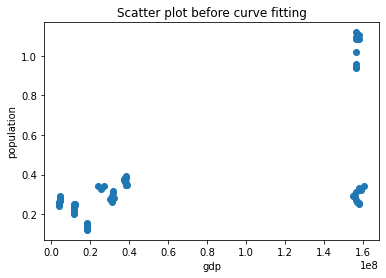

In [142]:
plt.scatter(d_full['gdp'],d_full['population'])
plt.title('Scatter plot before curve fitting')
plt.ylabel('population')
plt.xlabel('gdp')
plt.savefig('curvefit_before.png')
plt.show()

In [128]:
x = np.linspace(-10,10,101)
y = func(x,2.33,0.21,1.51) + np.random.normal(0,0.2,x.size)

popt, pcov = curve_fit(func, x, y)

y = (2.3x + 0.23) / 1.65


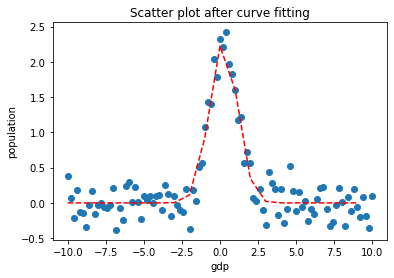

In [141]:
a, b, c = popt
print(f'y = ({round(a,2)}x + {round(b,2)}) / {round(c,2)}')

plt.scatter(x, y)
x_line = np.arange(min(x), max(x), 1)
y_line = func(x_line, a, b, c)
plt.ylabel('population')
plt.xlabel('gdp')
plt.title('Scatter plot after curve fitting')
plt.plot(x_line, y_line, '--', color='red')
plt.savefig('curvefit_after.png')
plt.show()